In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import mitdeeplearning as mdl
import tensorflow as tf
from tensorflow.keras import layers, models

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [84]:
tr_dir = r"C:\Work\DL\Dataset Gudeg-Soto\train"
ts_dir   = r"C:\Work\DL\Dataset Gudeg-Soto\test"
vl_dir =  r"C:\Work\DL\Dataset Gudeg-Soto\validation"

train_ds = tf.keras.utils.image_dataset_from_directory(
    tr_dir,
    image_size=(224, 224), 
    batch_size=90,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    ts_dir,
    image_size=(224, 224), 
    batch_size=10,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    vl_dir,
    image_size=(224, 224), 
    batch_size=10,
    shuffle=True
)


class_names = train_ds.class_names
print("Kelas:", class_names)

val_ds = val_ds.map(lambda x, y: (x/255.0, y))
test_ds = test_ds.map(lambda x, y: (x/255.0, y))

Found 342 files belonging to 4 classes.
Found 50 files belonging to 4 classes.
Found 40 files belonging to 4 classes.
Kelas: ['gudeg', 'gulai', 'rendang', 'soto']


In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([ #untuk menangani masalah overfitting karena telah terjadi sebelumnya. dengan menggunakan augmentasi data untuk memberi variasi data
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True)/255.0, y))

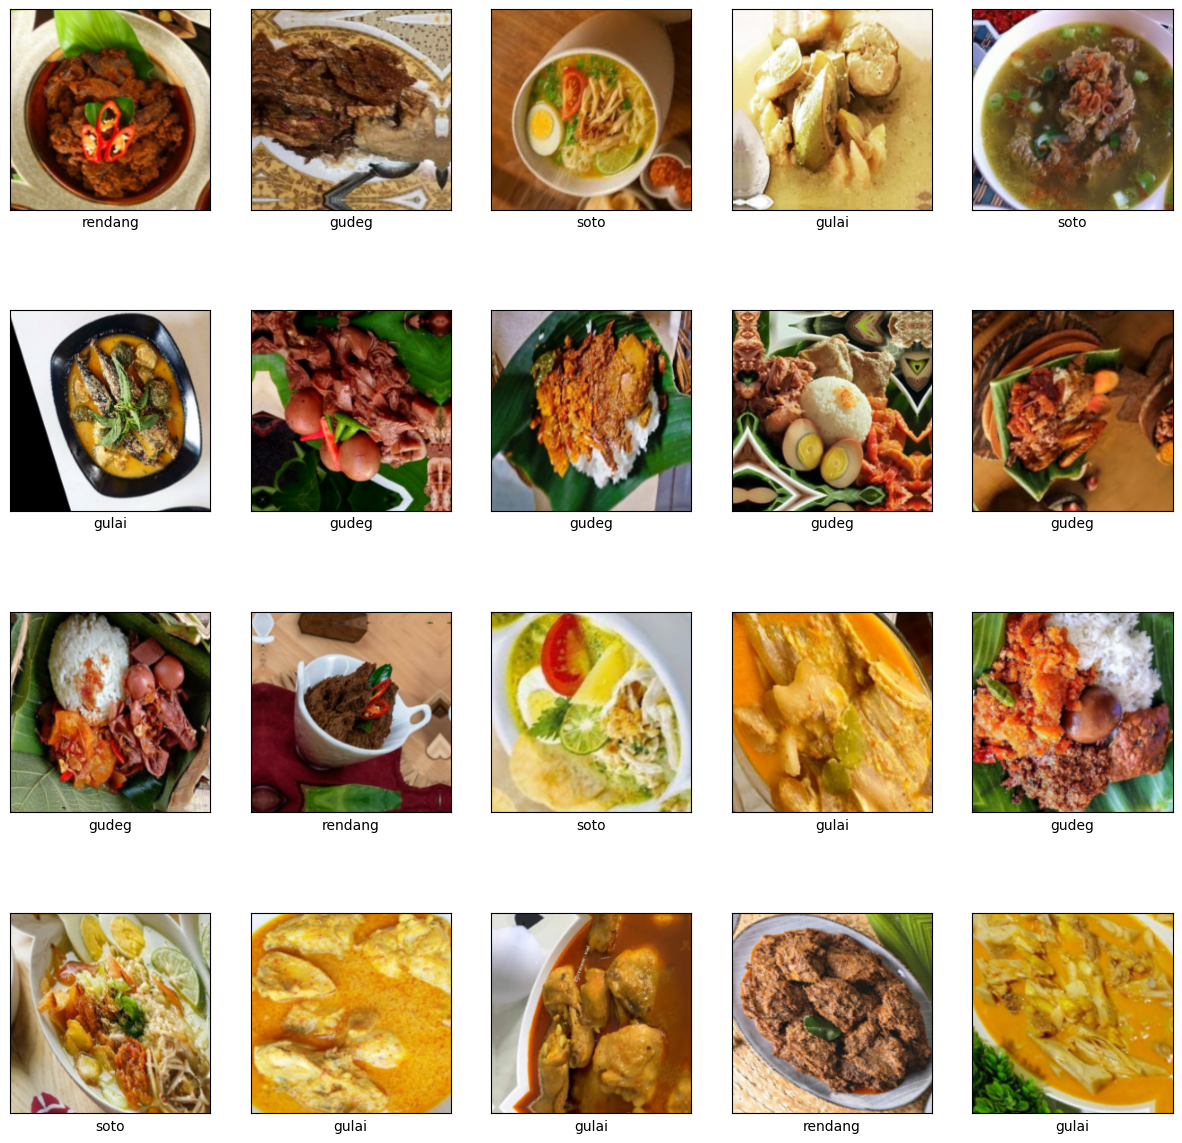

In [86]:
plt.figure(figsize=(15,15))

for images, labels in train_ds.take(1):  # ambil batch pertama
    num_images = images.shape[0]  # jumlah gambar di batch
    rand_i = np.random.choice(num_images, 20, replace=False)  # ambil 20 indeks random
    
    for i, idx in enumerate(rand_i):
        plt.subplot(4, 5, i+1)  # grid 4x5 untuk 20 gambar
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx].numpy())  # nilai float 0-1 langsung
        label_index = int(labels[idx].numpy())
        plt.xlabel(class_names[label_index])
plt.show()
 



In [87]:
model = models.Sequential([ # 3 Conv2D karena databasenya makanan 
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3), 
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

C:\Users\Pongo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005) #sebelumnya 0.001(default) tapi hasilnya overfitting

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/30


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2387 - loss: 2.9967 - val_accuracy: 0.3000 - val_loss: 1.4767
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2521 - loss: 1.9699 - val_accuracy: 0.2500 - val_loss: 1.3794
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2902 - loss: 1.3732 - val_accuracy: 0.3250 - val_loss: 1.3728
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3237 - loss: 1.3696 - val_accuracy: 0.3500 - val_loss: 1.3623
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3802 - loss: 1.3403 - val_accuracy: 0.3750 - val_loss: 1.3421
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.3429 - loss: 1.3082 - val_accuracy: 0.5250 - val_loss: 1.2600
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5295 - loss: 1.2098 - val_accuracy: 0.5000 - val_loss: 1.1885
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4743 - loss: 1.1501 - val_accuracy: 0.6250 - val_loss: 1.0143
Epoch 9/30
4/4 ━━━━━━━━

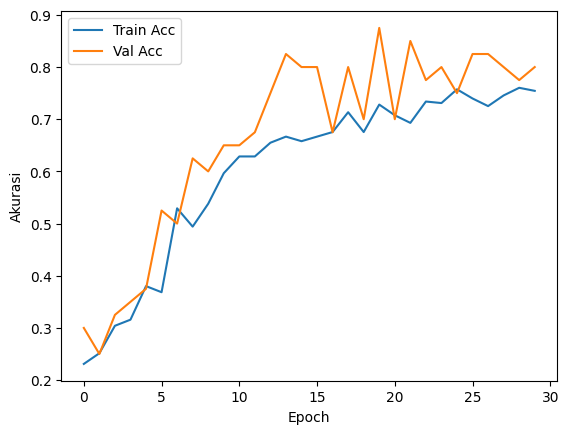

In [89]:
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds
)

test_loss, test_acc = model.evaluate(test_ds)
print("Akurasi :", test_acc)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()


   accuracy      loss  val_accuracy  val_loss
0  0.545833  1.086249      0.733333  1.081426
1  0.579167  1.050682      0.700000  1.007443
2  0.579167  0.987754      0.700000  0.899551
3  0.525000  0.944461      0.600000  0.821291
4  0.570833  0.910757      0.500000  0.919062


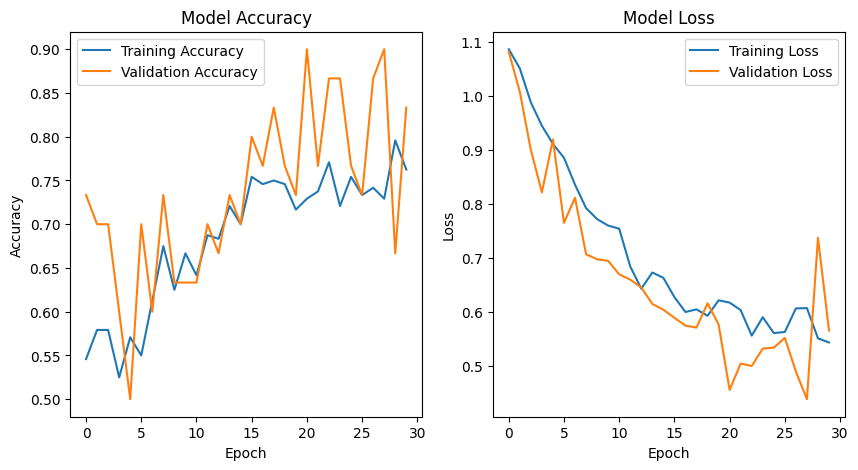

In [73]:
import pandas as pd

df_history = pd.DataFrame(history.history)
print(df_history.head())

# Menampilkan grafik akurasi dan loss
plt.figure(figsize=(10,5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(df_history['accuracy'], label='Training Accuracy')
plt.plot(df_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(df_history['loss'], label='Training Loss')
plt.plot(df_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


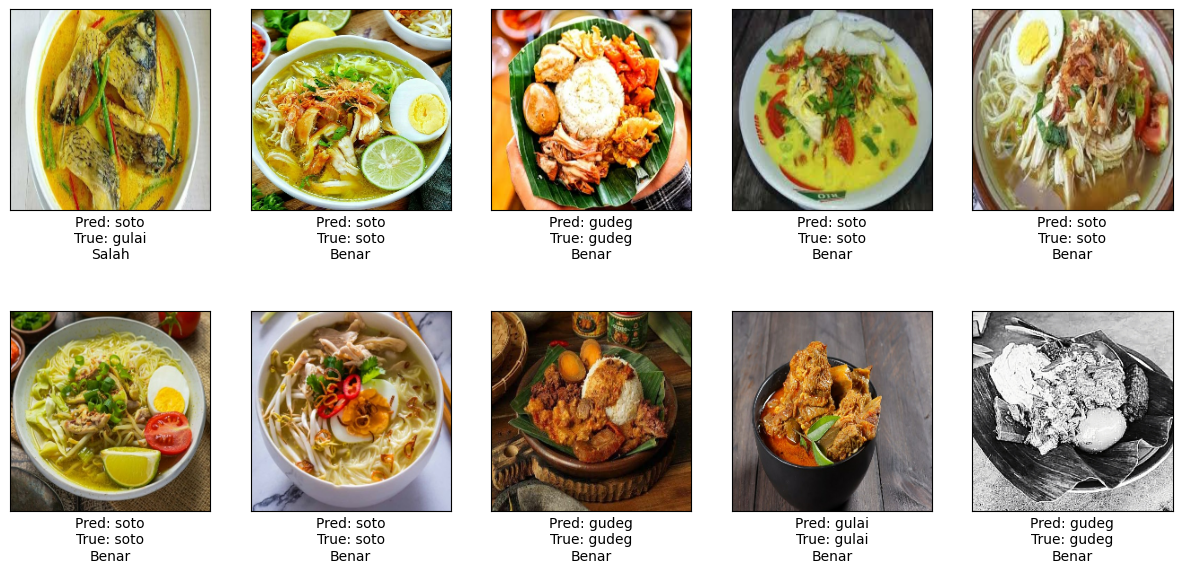

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil batch pertama dari validation dataset
for images, labels in val_ds.take(1):
    preds = model.predict(images)                  # prediksi softmax
    pred_labels = np.argmax(preds, axis=1)         # ambil kelas dengan probabilitas tertinggi

    plt.figure(figsize=(15,15))
    for i in range(len(images)):
        plt.subplot(4, 5, i+1)                     # grid sesuai jumlah gambar
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy())
        
        true_label = class_names[int(labels[i].numpy())]
        pred_label = class_names[pred_labels[i]]
        correct = (true_label == pred_label)
        
        # Tampilkan label prediksi + benar/salah
        plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}\n{'Benar' if correct else 'Salah'}", fontsize=10)
    plt.show()
